In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df=pd.DataFrame()
for no in range(10,38):
    temp=pd.read_csv("Processed Data/fileID"+str(no)+"_ProcessedTripData.csv",header= None)
    #print(temp)  
    df=pd.concat([df,temp])

df.columns=['Time','Vehicle Speed','SHIFT','Engine Load','Total Acceleration','Engine RPM','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush']

# Multiply the 'Vehicle Speed' by 3.6 to get km/h
df['Vehicle Speed'] = df['Vehicle Speed'] * 3.6

newdf = df[df.SHIFT != 0]
newdf = newdf.reset_index(drop=True)

# Column SHIFT moved to the last position
column_to_move = 'SHIFT'
columns = [col for col in newdf.columns if col != column_to_move]
newdf = newdf[columns + [column_to_move]]

df = newdf

df.dropna(inplace=True)

# Set the display format to show real numbers, not scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID11_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID32_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID13_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID9_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID26_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID19_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID2_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID33_ProcessedTripData.csv
/home/vortex/isep/project/datasets/gear-box-prediction/TripData/Processed Data/fileID36_ProcessedTripData.csv
/home/vortex

,Time,Vehicle Speed,Engine Load,Total Acceleration,Engine RPM,Pitch,Lateral Acceleration,Passenger Count,Car Load,AC Status,Window Opening,Radio Volume,Rain Intensity,Visibility,Driver Wellbeing,Driver Rush,SHIFT
count,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000,3228015.000
mean,1342.519,46.641,10.357,0.272,2039.619,1.244,-0.021,0.658,4.639,0.086,0.593,3.469,0.152,9.676,6.510,3.016,3.412
std,901.246,24.403,8.100,0.694,553.765,1.896,0.521,0.859,2.165,0.372,1.309,2.105,0.532,0.678,1.058,1.083,1.256
min,7.677,4.773,2.000,-5.101,800.020,-10.549,-5.963,0.000,3.000,0.000,0.000,0.000,0.000,7.000,4.000,0.000,1.000
25%,585.950,28.186,4.122,-0.148,1674.200,0.604,-0.111,0.000,3.000,0.000,0.000,2.000,0.000,10.000,6.000,3.000,2.000
50%,1238.500,42.264,8.054,0.223,1987.300,1.307,-0.006,0.000,3.000,0.000,0.000,4.000,0.000,10.000,7.000,3.000,3.000
75%,1886.900,64.890,13.584,0.626,2292.400,1.970,0.085,1.000,7.000,0.000,0.000,5.000,0.000,10.000,7.000,3.000,5.000
max,4287.900,115.150,69.655,4.523,5680.800,12.277,5.777,4.000,8.000,4.000,6.000,8.000,3.000,10.000,8.000,5.000,5.000


In [2]:
df.head()

,Time,Vehicle Speed,Engine Load,Total Acceleration,Engine RPM,Pitch,Lateral Acceleration,Passenger Count,Car Load,AC Status,Window Opening,Radio Volume,Rain Intensity,Visibility,Driver Wellbeing,Driver Rush,SHIFT
0,60.569,9.987,7.843,-0.173,1306.500,-1.625,1.599,0,3,0,2,6,0,9,5,3,1
1,60.579,9.965,7.826,-0.195,1308.800,-1.642,1.599,0,3,0,2,6,0,9,5,3,1
2,60.589,9.940,7.809,-0.214,1311.100,-1.659,1.595,0,3,0,2,6,0,9,5,3,1
3,60.599,9.910,7.791,-0.231,1313.600,-1.676,1.568,0,3,0,2,6,0,9,5,3,1
4,60.608,9.893,7.774,-0.245,1316.100,-1.693,1.565,0,3,0,2,6,0,9,5,3,1


In [2]:
# Feature Importance
# No GridSearchCV take into consideration
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = df.drop(columns=['SHIFT'])
y = df['SHIFT']

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Get feature importance
feature_importance = clf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

print(feature_importance_df.sort_values(by='Importance', ascending=False))

                 Feature  Importance
1          Vehicle Speed       0.690
4             Engine RPM       0.268
8               Car Load       0.024
3     Total Acceleration       0.015
5                  Pitch       0.002
6   Lateral Acceleration       0.001
0                   Time       0.001
11          Radio Volume       0.000
2            Engine Load       0.000
10        Window Opening       0.000
14      Driver Wellbeing       0.000
13            Visibility       0.000
12        Rain Intensity       0.000
7        Passenger Count       0.000
9              AC Status       0.000
15           Driver Rush       0.000


In [3]:
# Correlation Matrix
# ALL FEATURES no seaborn graph
# No GridSearchCV take into consideration

correlation_matrix = df.corr()

print(correlation_matrix)


                       Time  Vehicle Speed  Engine Load  Total Acceleration  \
Time                  1.000          0.133       -0.039               0.010   
Vehicle Speed         0.133          1.000        0.368              -0.067   
Engine Load          -0.039          0.368        1.000               0.695   
Total Acceleration    0.010         -0.067        0.695               1.000   
Engine RPM            0.027          0.675        0.672               0.246   
Pitch                 0.084          0.043        0.383               0.515   
Lateral Acceleration -0.004          0.001       -0.025              -0.028   
Passenger Count      -0.024          0.190        0.066               0.039   
Car Load              0.338          0.669        0.151              -0.030   
AC Status            -0.103         -0.140        0.049               0.023   
Window Opening       -0.297         -0.178       -0.047               0.006   
Radio Volume         -0.258         -0.323        0.

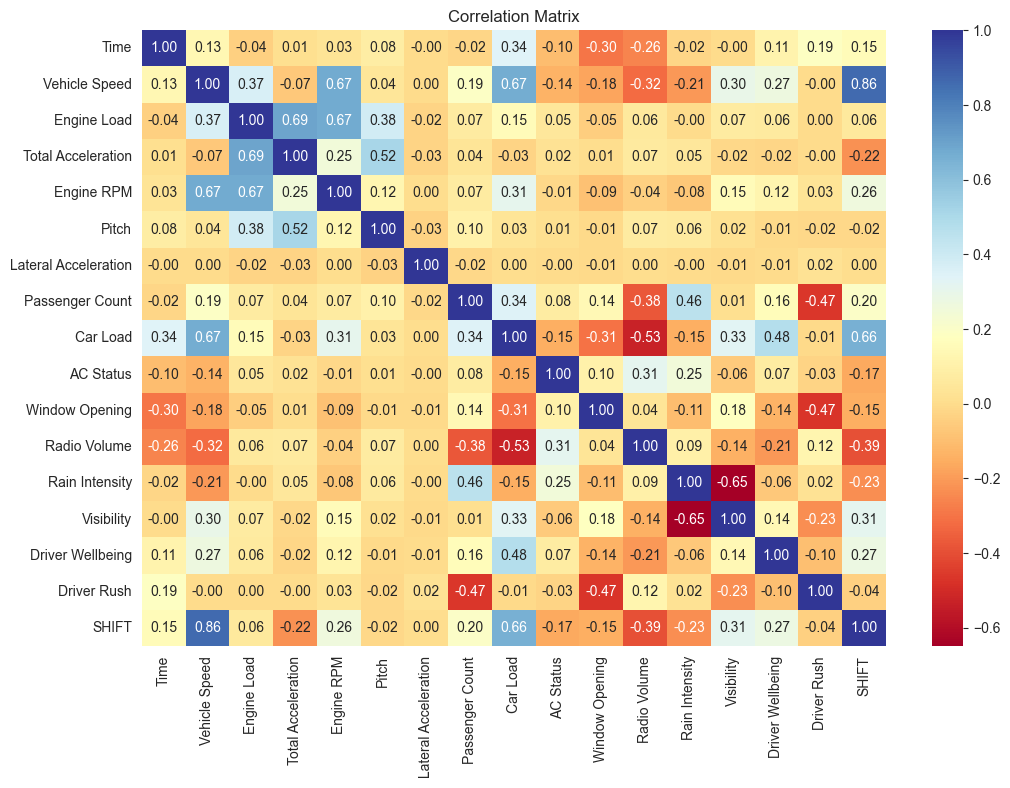

In [8]:
# Correlation Matrix
# ALL FEATURES seaborn graph
# No GridSearchCV take into consideration

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
heat = sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show() 

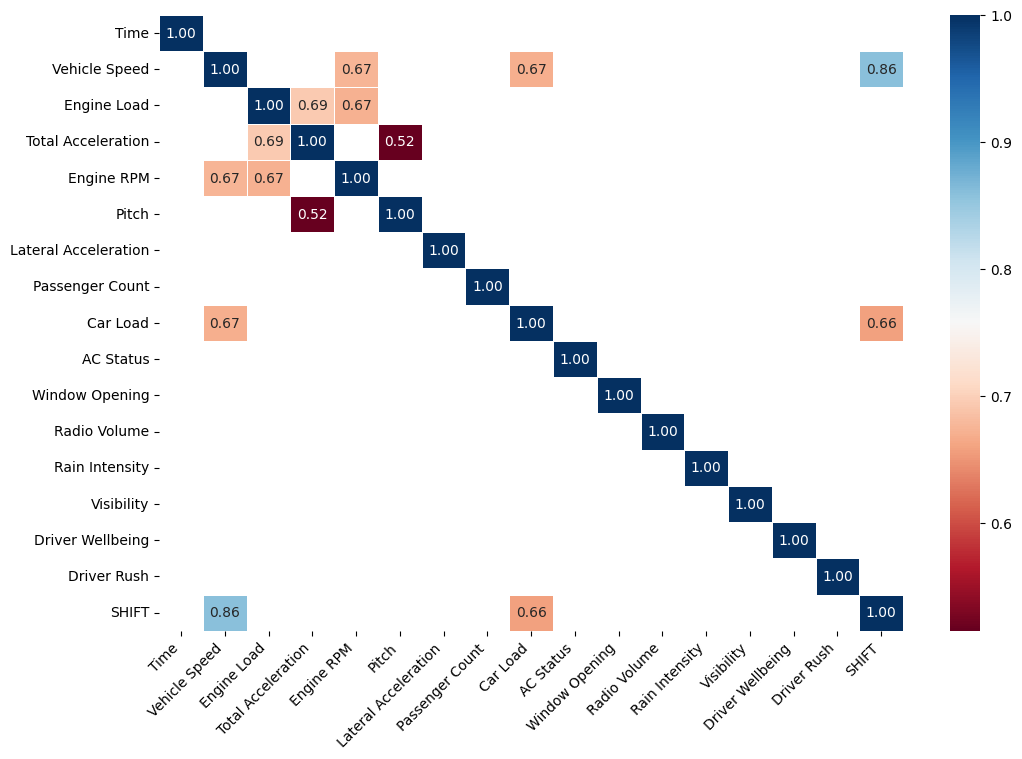

In [21]:
# Correlation Matrix
# ALL FEATURES with threshold > 0.50
# No GridSearchCV take into consideration

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

threshold = 0.50
filtered_data = np.where(correlation_matrix > threshold, correlation_matrix, np.nan)

filtered_df = pd.DataFrame(filtered_data, index=correlation_matrix.index, columns=correlation_matrix.columns)

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(filtered_df, cmap='RdBu', annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [33]:
# Code to perform Grid Search Cross-Validation to find the best parameters
# 4 FEATURES
# 4 FEATURES

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Get feature importance
feature_importance = clf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

print(feature_importance_df.sort_values(by='Importance', ascending=False))

most_important_features_df = feature_importance_df[feature_importance_df['Importance'] > 0.001]
most_important_features_df = most_important_features_df[most_important_features_df['Feature'] != 'Car Load']

X_five = df[most_important_features_df['Feature']]
y_five = df['SHIFT']

x_train_five, x_test_five, y_train_five, y_test_five = train_test_split(X_five, y_five, test_size=0.3, random_state=42)

# Define hyperparameters and values to search
# This aims to find the best set of hyperparameters for your machine learning model.
# Grid Search, which exhaustively evaluates all combinations of hyperparameters
param_grid = {
    'max_depth': [5, 7, 9],                  # Depth of the tree
    'min_samples_split': [3, 7, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4, 6]            # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(x_train_five, y_train_five)

# Predictions
predictions = clf.predict(x_test_five)

print(f"Accuracy: {accuracy_score(y_test_five, predictions)}")

print(f"Classification Report: {classification_report(y_test_five, predictions)}")

# Grid Search Cross-Validation to find the best parameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(x_train_five, y_train_five)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(x_train_five, y_train_five)

# 5-fold cross-validation
cv_scores = cross_val_score(best_clf, X_five, y_five, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Accuracy: 0.9999824453611867
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00     60899
           2       1.00      1.00      1.00    201252
           3       1.00      1.00      1.00    244905
           4       1.00      1.00      1.00    199911
           5       1.00      1.00      1.00    261438

    accuracy                           1.00    968405
   macro avg       1.00      1.00      1.00    968405
weighted avg       1.00      1.00      1.00    968405

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
Cross-Validation Scores: [0.98586748 0.9992689  0.98994428 0.99945477 0.99035011]
Mean CV Score: 0.9929771082228551


Accuracy: 0.9515719146431504
Classification Report:               precision    recall  f1-score   support

           1       0.99      0.94      0.97     60899
           2       0.92      0.97      0.94    201252
           3       0.97      0.93      0.95    244905
           4       0.94      0.94      0.94    199911
           5       0.97      0.96      0.96    261438

    accuracy                           0.95    968405
   macro avg       0.96      0.95      0.95    968405
weighted avg       0.95      0.95      0.95    968405



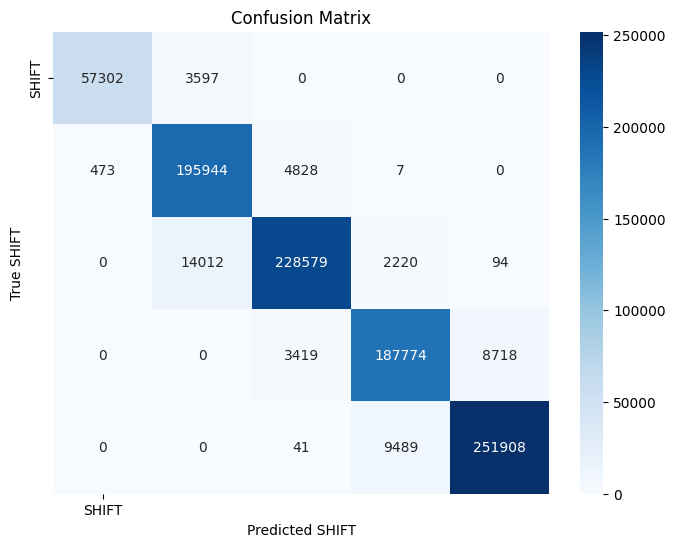

In [38]:
# Code to generate Confusion Matrix
# 4 MOST IMPORTANT FEATURES
# Vehicle Speed, Engine RPM, Total Acceleration, Pitch
# WITH GridSearchCV take into consideration
# BUT using max_depth = 5

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Train a Decision Tree Classifier with best params
best_params = grid_search.best_params_
clf = DecisionTreeClassifier(random_state=42, max_depth= 5, min_samples_leaf= 1, min_samples_split=3)
clf.fit(x_train_five, y_train_five)

# Predict clusters for the test data
predictions = clf.predict(x_test_five)

print(f"Accuracy: {accuracy_score(y_test_five, predictions)}")

print(f"Classification Report: {classification_report(y_test_five, predictions)}")

predicted_clusters = clf.predict(x_test_five)

conf_matrix = confusion_matrix(y_test_five, predicted_clusters)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['SHIFT'], yticklabels=['SHIFT'])
plt.xlabel('Predicted SHIFT')
plt.ylabel('True SHIFT')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Code to try to extract rules

from sklearn.tree import _tree

# Function to extract rules from decision tree
def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"If {name} <= {threshold}:")
            recurse(tree_.children_left[node])
            print(f"Else (If {name} > {threshold}): ")
            recurse(tree_.children_right[node])
        else:
            print(f"Predict Class {tree_.value[node]} \n")

    recurse(0)

extract_rules(best_clf, feature_names=list(X.columns))

If Time <= 54.95940017700195:
If Time <= 30.90042018890381:
If Time <= 14.725619792938232:
If Engine Load <= 1198.5499877929688:
If Time <= 9.391319751739502:
Predict Class [[32436.     0.     0.     0.     0.]] 

Else (If Time > 9.391319751739502): 
Predict Class [[    0. 35285.     0.     0.     0.]] 

Else (If Engine Load > 1198.5499877929688): 
If Time <= 14.327459812164307:
If Engine Load <= 1223.75:
If Time <= 11.65176010131836:
Predict Class [[2281.    0.    0.    0.    0.]] 

Else (If Time > 11.65176010131836): 
Predict Class [[ 0. 53.  0.  0.  0.]] 

Else (If Engine Load > 1223.75): 
If Time <= 14.258339881896973:
If Time <= 14.233139991760254:
Predict Class [[70119.     0.     0.     0.     0.]] 

Else (If Time > 14.233139991760254): 
If Engine Load <= 1583.7999877929688:
Predict Class [[0. 1. 0. 0. 0.]] 

Else (If Engine Load > 1583.7999877929688): 
Predict Class [[197.   0.   0.   0.   0.]] 

Else (If Time > 14.258339881896973): 
If Engine Load <= 1584.2000122070312:
Predic

Group rules by shift prediction

In [41]:
import numpy as np

# Initialize the dictionary
gears_pred = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []
}

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # Sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "

        if class_names is None:
            response = np.round(path[-1][0][0], 3)
            class_str = f"class: {response} ({int(response)} to 5)"
        else:
            classes = path[-1][0][0]
            class_idx = np.argmax(classes)
            response = class_names[class_idx]
            proba = np.round(100.0 * classes[class_idx] / np.sum(classes), 2)
            class_str = f"class: {response}" #(proba: {proba}%)"

        rule += f"{class_str} " #| based on {path[-1][1]:,} samples"
        gears_pred[int(response)].append(rule)
        rules.append(rule)

    return rules

# Define class names for your case
class_names = ['1', '2', '3', '4', '5']

rules = get_rules(clf, clf.feature_names_in_, class_names)
# for r in rules:
#     print(r)

# Print the rules associated with each class
for gear_num, rules in gears_pred.items():
    print(f"\nClass {gear_num}:")
    for rule in rules:
        print(f" {rule}")




Class 1:
 if (Vehicle Speed <= 54.959) and (Vehicle Speed <= 30.9) and (Vehicle Speed <= 14.726) and (Engine RPM > 1198.55) and (Vehicle Speed <= 14.327) then class: 1 
 if (Vehicle Speed <= 54.959) and (Vehicle Speed <= 30.9) and (Vehicle Speed <= 14.726) and (Engine RPM <= 1198.55) and (Vehicle Speed <= 9.391) then class: 1 
 if (Vehicle Speed <= 54.959) and (Vehicle Speed <= 30.9) and (Vehicle Speed > 14.726) and (Engine RPM > 1642.55) and (Vehicle Speed <= 20.013) then class: 1 
 if (Vehicle Speed <= 54.959) and (Vehicle Speed <= 30.9) and (Vehicle Speed <= 14.726) and (Engine RPM > 1198.55) and (Vehicle Speed > 14.327) then class: 1 

Class 2:
 if (Vehicle Speed <= 54.959) and (Vehicle Speed <= 30.9) and (Vehicle Speed > 14.726) and (Engine RPM > 1642.55) and (Vehicle Speed > 20.013) then class: 2 
 if (Vehicle Speed <= 54.959) and (Vehicle Speed <= 30.9) and (Vehicle Speed > 14.726) and (Engine RPM <= 1642.55) and (Vehicle Speed <= 20.977) then class: 2 
 if (Vehicle Speed <= 54